In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
news = pd.read_csv("../data/News/FAANG_STOCK_NEWS.csv", index_col=0)
print(news)

    ticker        date     time  \
0       FB  2021-09-22  06:30AM   
1       FB  2021-09-22  02:23AM   
2       FB  2021-09-22  12:36AM   
3       FB  2021-09-22  12:27AM   
4       FB  2021-09-21  10:34PM   
..     ...         ...      ...   
495  GOOGL  2021-09-15  05:25PM   
496  GOOGL  2021-09-15  04:43PM   
497  GOOGL  2021-09-15  04:21PM   
498  GOOGL  2021-09-15  03:01PM   
499  GOOGL  2021-09-15  02:42PM   

                                              headline    neg    neu    pos  \
0    2 Growth Stocks to Buy Hand Over Fist If the M...  0.000  0.608  0.392   
1    UPDATE 1-Facebook wraps up deals with Australi...  0.167  0.833  0.000   
2    Facebook wraps up deals with Australian media ...  0.179  0.821  0.000   
3    Facebook wraps up deals with Australia media f...  0.000  1.000  0.000   
4    Facebook overpaid FTC fine as quid pro quo to ...  0.099  0.659  0.242   
..                                                 ...    ...    ...    ...   
495            10 Cheap Sp

([<matplotlib.patches.Wedge at 0x1433ffc70>,
 [Text(0.8899186877588753, 0.6465637858537406, 'FB'),
  Text(-0.3399187231970732, 1.046162158377023, 'GOOGL'),
  Text(-1.0999999999999988, -5.149471622296949e-08, 'AAPL'),
  Text(-0.33991862524830174, -1.0461621902025062, 'AMZN'),
  Text(0.8899187482945414, -0.6465637025335375, 'NFLX')],
 [Text(0.6472135910973638, 0.4702282078936295, '20%'),
  Text(-0.2472136168705987, 0.7608452060923805, '20%'),
  Text(-0.7999999999999992, -3.7450702707614176e-08, '20%'),
  Text(-0.24721354563512854, -0.7608452292381863, '20%'),
  Text(0.6472136351233029, -0.47022814729711815, '20%')])

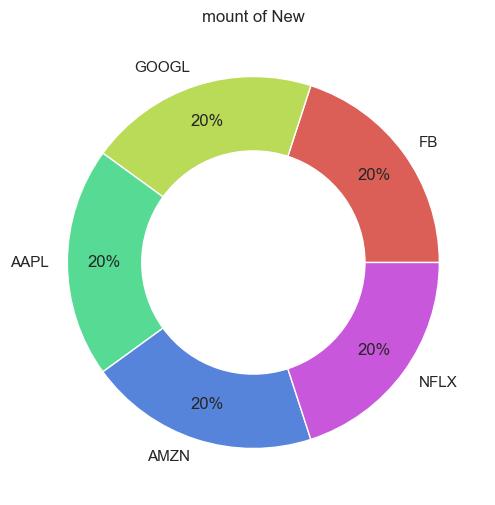

In [43]:
faang = ["FB", "GOOGL", "AAPL", "AMZN", "NFLX"]
expand = [news[news["ticker"]==n].shape[0] for n in faang]
plt.title("mount of New")
plt.pie(expand, labels = faang, colors = sns.hls_palette(n_colors=5), 
        radius=1, wedgeprops={'linewidth':1,'width':0.4}, autopct='%1.0f%%', pctdistance=0.8)


/var/folders/g5/4576b0tj6k3g5p1pxwxvnjq80000gn/T/ipykernel_93627/848227635.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(news["pos"][news["pos"]>0])


<AxesSubplot: xlabel='pos', ylabel='Density'>

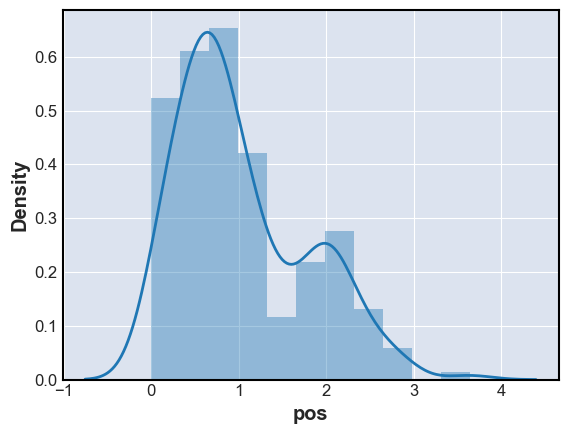

In [32]:
sns.distplot(news["pos"][news["pos"]>0])

<AxesSubplot: title={'center': 'Neutral News of FAANG'}, xlabel='ticker', ylabel='neu'>

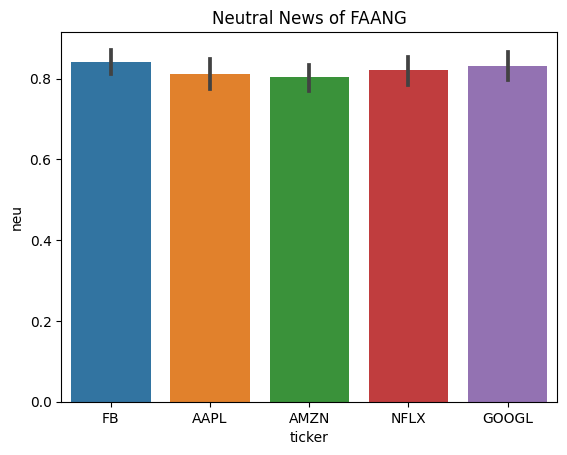

In [5]:
plt.title("Neutral News of FAANG") # 圖的標題
sns.barplot(x="ticker", y="neu", data = news) # 繪製長條圖

In [6]:
# print(news["neu"])
faang = ["FB", "GOOGL", "AAPL", "AMZN", "NFLX"]
state = ["pos", "neg", "neu"]
pos_num, neg_num, neu_num = [], [], []
for stock_name in faang:
    stock_news = news[(news["ticker"] == stock_name)]
    pos_num.append((stock_news["pos"]>stock_news["neg"]).sum())
    neg_num.append((stock_news["pos"]<stock_news["neg"]).sum())
    neu_num.append((stock_news["pos"]==stock_news["neg"]).sum())
neu_sum = [sum(x) for x in zip(pos_num, neu_num)]

Text(0.5, 1.0, 'Positive News vs Negative News')

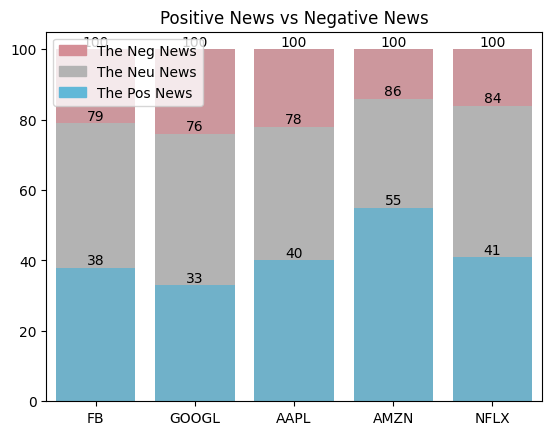

In [7]:
import matplotlib.patches as mp 
ax=sns.barplot(x=faang,y=[100 for _ in range(5)],color='#d58e96')
ax=sns.barplot(x=faang,y=neu_sum,color='#b3b3b3')
ax=sns.barplot(x=faang,y=pos_num,color='#61b8d8')
for i in range(3): ax.bar_label(ax.containers[i])
blue_patch = mp.Patch(color='#61b8d8', label='The Pos News',)
red_patch = mp.Patch(color='#d58e96', label='The Neg News')
gray_patch = mp.Patch(color='#b3b3b3', label='The Neu News')
ax.legend(handles=[red_patch,gray_patch,  blue_patch, ])
ax.set_title('Positive News vs Negative News')

In [38]:
price = pd.read_csv("../data/Stock/stock.csv", index_col=0)
print(price)

              meta      goog      amzn      nflx      aapl
Date                                                      
2012-05-18   38.23   14.9539   10.6925    9.9943   16.1734
2012-05-21   34.03   15.2954   10.9055   10.2486   17.1157
2012-05-22   31.00   14.9639   10.7665    9.6729   16.9842
2012-05-23   32.00   15.1796   10.8640   10.2729   17.3987
2012-05-24   33.03   15.0351   10.7620   10.0386   17.2389
...            ...       ...       ...       ...       ...
2022-10-03  138.61   99.3000  115.8800  239.0400  142.4500
2022-10-04  140.28  102.4100  121.0900  240.7400  146.1000
2022-10-05  138.98  102.2200  120.9500  236.7300  146.4000
2022-10-06  139.07  102.2400  120.3000  240.0200  145.4300
2022-10-07  133.45   99.5700  114.5600  224.7500  140.0900

[2615 rows x 5 columns]


In [44]:
import ffn

price = price[['goog','amzn','meta','nflx', "aapl"]]
price.iloc[-500:].rebase().plot_corr_heatmap()
plt.title("500 days Corr")
plt.savefig("../src/corr2.jpg")

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf


/Users/henrytsui/miniforge3/envs/IDS/lib/python3.8/site-packages/mplfinance/_styles.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style['base_mpl_style'])


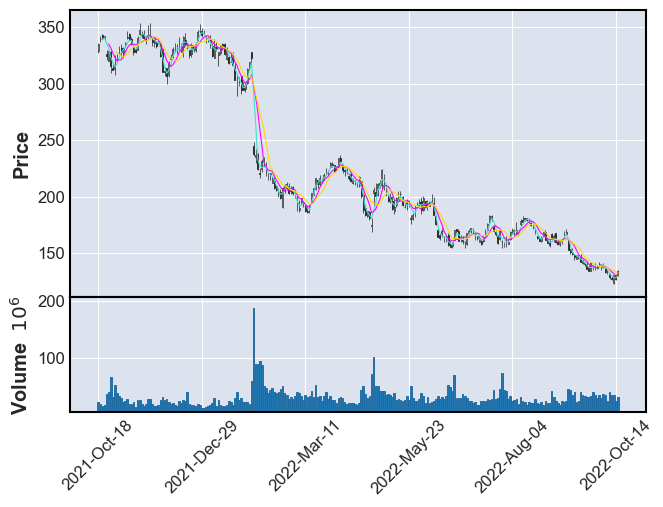

/Users/henrytsui/miniforge3/envs/IDS/lib/python3.8/site-packages/mplfinance/_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
/Users/henrytsui/miniforge3/envs/IDS/lib/python3.8/site-packages/mplfinance/_styles.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style['base_mpl_style'])


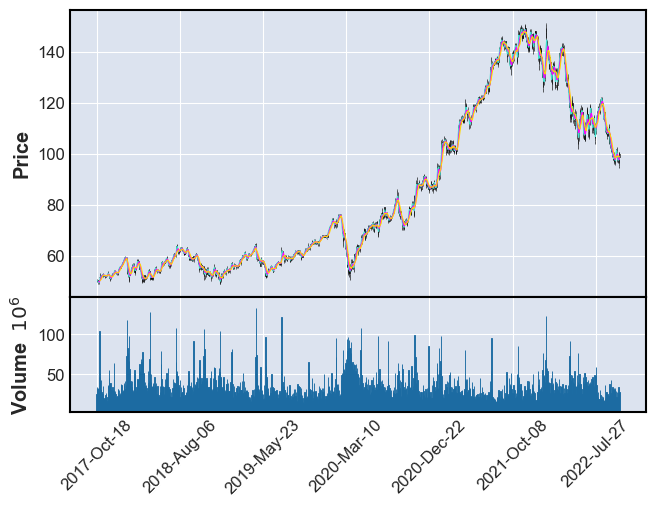

/Users/henrytsui/miniforge3/envs/IDS/lib/python3.8/site-packages/mplfinance/_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
/Users/henrytsui/miniforge3/envs/IDS/lib/python3.8/site-packages/mplfinance/_styles.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style['base_mpl_style'])


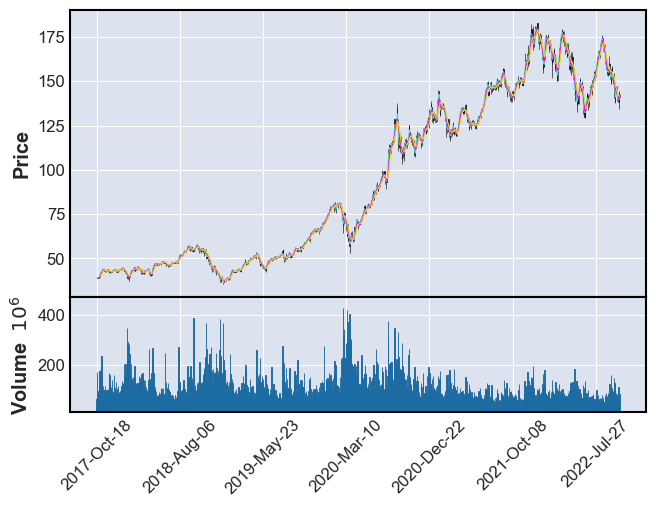

/Users/henrytsui/miniforge3/envs/IDS/lib/python3.8/site-packages/mplfinance/_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
/Users/henrytsui/miniforge3/envs/IDS/lib/python3.8/site-packages/mplfinance/_styles.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style['base_mpl_style'])


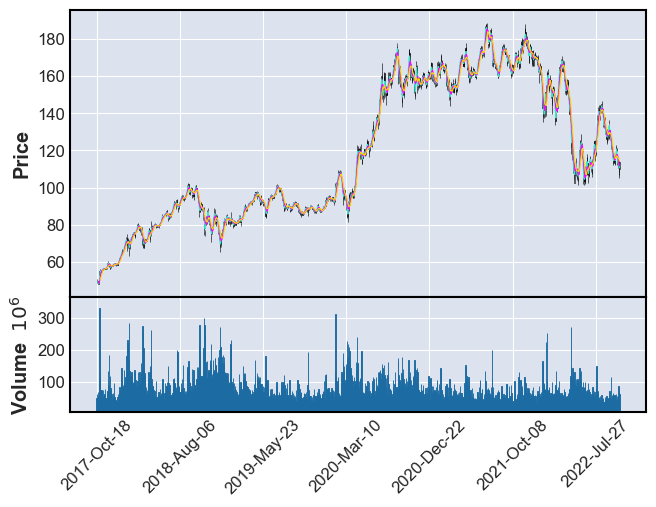

/Users/henrytsui/miniforge3/envs/IDS/lib/python3.8/site-packages/mplfinance/_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
/Users/henrytsui/miniforge3/envs/IDS/lib/python3.8/site-packages/mplfinance/_styles.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style['base_mpl_style'])


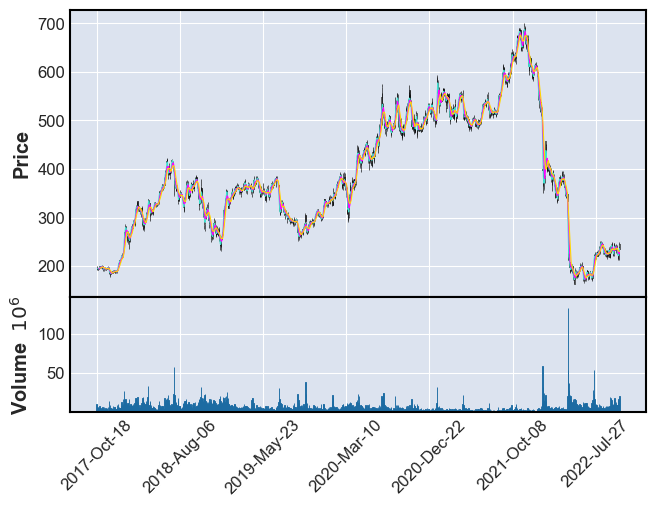

In [36]:
for name in faang:
    data=web.DataReader(name,'yahoo')
    mpf.plot(data,type='candle',mav=(3,6,9),volume=True)

In [24]:
np.linspace(0.1, 0.9, 5)

array([0.1, 0.3, 0.5, 0.7, 0.9])

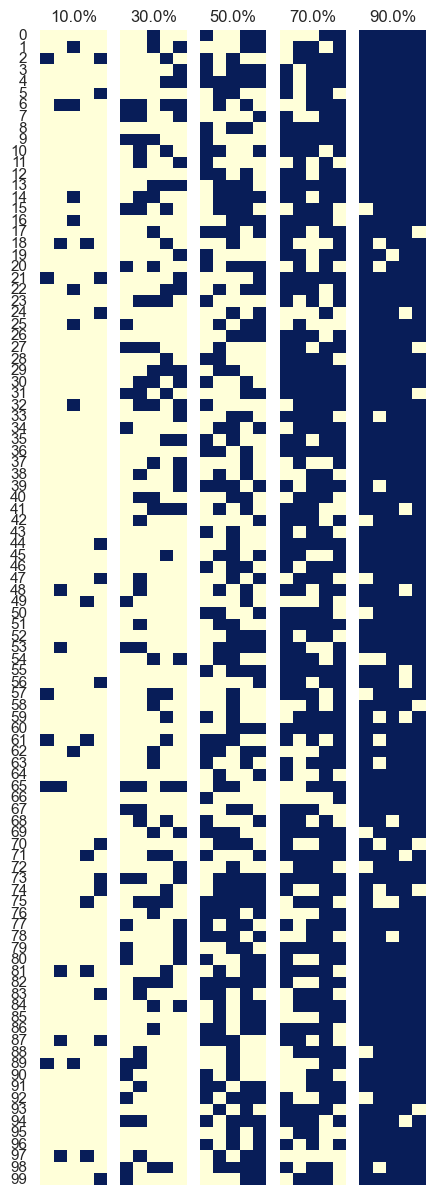

In [36]:
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
price = pd.read_csv("../data/Stock/stock.csv", index_col=0)
sns.set(rc={'figure.figsize':(6,15)})
for idx,  mask_percent in enumerate(np.linspace(0.1, 0.9, 5)):
    plt.subplot(161+idx)
    plt.title(f"{mask_percent.round(2)*100}%")
    MASK = np.random.choice([True, False], size=(100, 5), p=[mask_percent, 1-mask_percent])
    ax = sns.heatmap(MASK,cbar=False, yticklabels=(True if idx == 0 else False), xticklabels=False, cmap="YlGnBu")
plt.show()

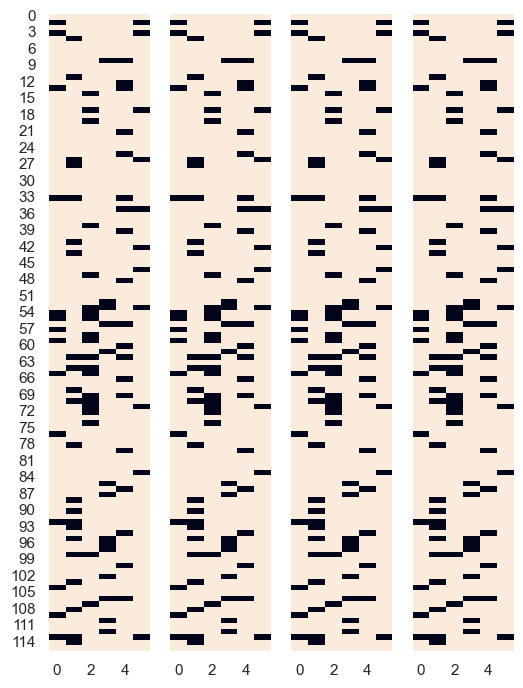

In [41]:
plt.subplot(141)
sns.heatmap(~MASK,cbar=False)
plt.subplot(142)
sns.heatmap(~MASK,cbar=False, yticklabels=False)
plt.subplot(143)
sns.heatmap(~MASK,cbar=False, yticklabels=False)